<a href="https://colab.research.google.com/github/arifanwar02431/Materi/blob/main/Praktik_AI/9_Pemodelan_menggunakan_laplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Transfer Function Motor DC
Motor DC dapat dimodelkan dalam domain Laplace untuk menganalisis respons kecepatan sudut terhadap tegangan input. Berikut adalah model motor DC dalam domain Laplace:

##Persamaan Motor DC

1.   Tegangan Input

$V(s)=L⋅I(s)+R⋅I(s)+Ke.ω(s)$

2. Torsi

$T(s)=K_t⋅I(s)$

3. Kecepatan sudut

$J⋅s⋅ω(s)+B⋅ω(s)=T(s)$

Dimana:


*   $I(s)$ adalah arus dalam domain Laplace.
*   $ω(s)$ adalah kecepatan sudut dalam domain Laplace.
* $T(s)$ adalah torsi dalam domain Laplace.
* $V(s)$ adalah tegangan input dalam domain Laplace.
* $L,R,K_e,K_t,J,B$ adalah parameter motor DC.


$\frac{ω(s)}{V(s)} = \frac{K_t}{J.s + B}.\frac{1}{L.s^2+(R+B).s+K_e.K_t}$








In [ ]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 6.7 MB/s eta 0:00:00


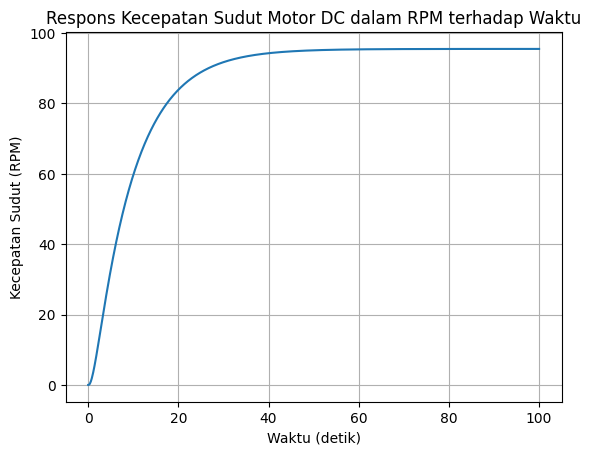

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Parameter motor DC
R = .1      # Resistansi (Ohm)
L = 0.1      # Induktansi (H)
K_e = 0.01   # Konstanta EMF (V.s/rad)
K_t = 0.01   # Konstanta torsi (Nm/A)
J = 0.01     # Momen inersia (kg.m^2)
B = 0.1      # Friksi (Nm.s)

# Fungsi Transfer Motor DC
num = [K_t]  # Numerator (K_t)
den = [J*L, (J*R + L*B), (R*B + K_e*K_t), (B*K_e)]  # Denominator

# Fungsi Transfer Sistem Motor DC
motor_dc = ctrl.TransferFunction(num, den)

# Waktu simulasi (10 detik dengan 1000 titik data)
t = np.linspace(0, 100, 1000)

# Respons terhadap input step (tegangan input konstan)
t, y = ctrl.step_response(motor_dc, t)

# Mengonversi hasil dari rad/s ke RPM
y_rpm = (y * 60) / (2 * np.pi)

# Grafik Kecepatan Sudut dalam RPM terhadap Waktu
plt.plot(t, y_rpm)
plt.title('Respons Kecepatan Sudut Motor DC dalam RPM terhadap Waktu')
plt.xlabel('Waktu (detik)')
plt.ylabel('Kecepatan Sudut (RPM)')
plt.grid(True)
plt.show()


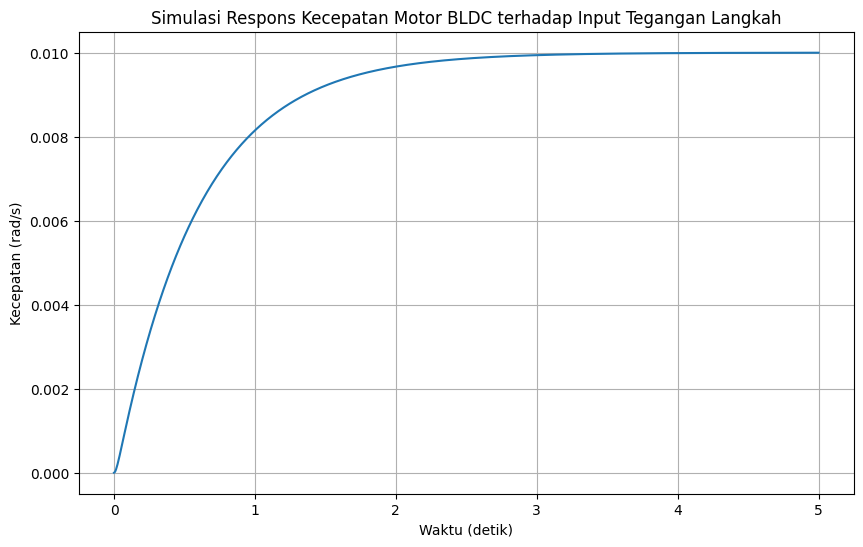

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parameter motor BLDC
J = 0.01  # Momen inersia rotor (kg.m^2)
B = 0.1   # Koefisien gesekan (Nms/rad)
L = 0.5   # Induktansi (H)
R = 1.0   # Resistansi (Ohm)
Ke = 0.01 # Konstanta back EMF (V.s/rad)

# Transfer function motor BLDC: omega(s) / V(s)
numerator = [Ke]
denominator = [J, B + L, R + Ke**2]

# Membuat sistem transfer function
system = signal.TransferFunction(numerator, denominator)

# Simulasi respons terhadap input tegangan langkah (step input)
time = np.linspace(0, 5, 1000)  # Waktu simulasi (0 hingga 5 detik)
t, y = signal.step(system, T=time)

# Plot hasil simulasi
plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.title("Simulasi Respons Kecepatan Motor BLDC terhadap Input Tegangan Langkah")
plt.xlabel("Waktu (detik)")
plt.ylabel("Kecepatan (rad/s)")
plt.grid(True)
plt.show()
